<a href="https://colab.research.google.com/github/AlisionXue/Predictive-Model-Class/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 修改为你的实际路径
file_path = '/content/drive/my-drive/客户信息.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=18WH0LIH0IhMlvVz2WAV9MNHFSyFeRYnD
To: /content/client_data.csv
100%|██████████| 556k/556k [00:00<00:00, 9.35MB/s]



✅ 数据加载成功！记录数：7043
数据前两行示例：
  churn  gender  age under_30 partner dependents married phone_service  \
0    No  Female   37       No     Yes         No     Yes           Yes   
1    No    Male   46       No      No         No      No           Yes   

  internet_service online_security  ... device_protection  \
0              Yes              No  ...                No   
1              Yes              No  ...                No   

  premium_tech_support streaming_tv streaming_movies streaming_music  \
0                  Yes          Yes               No              No   
1                   No           No              Yes             Yes   

  paperless_billing total_charges  total_refunds  total_extra_data_charges  \
0               Yes         593.3           0.00                         0   
1                No         542.4          38.33                        10   

   total_long_distance_charges  
0                       381.51  
1                        96.21  

[2 rows x 21 

<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 21484 (\N{CJK UNIFIED IDEOGRAPH-53EC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-3126a45c308b>:208: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from font(s) DejaVu Sans.
  fig.canvas

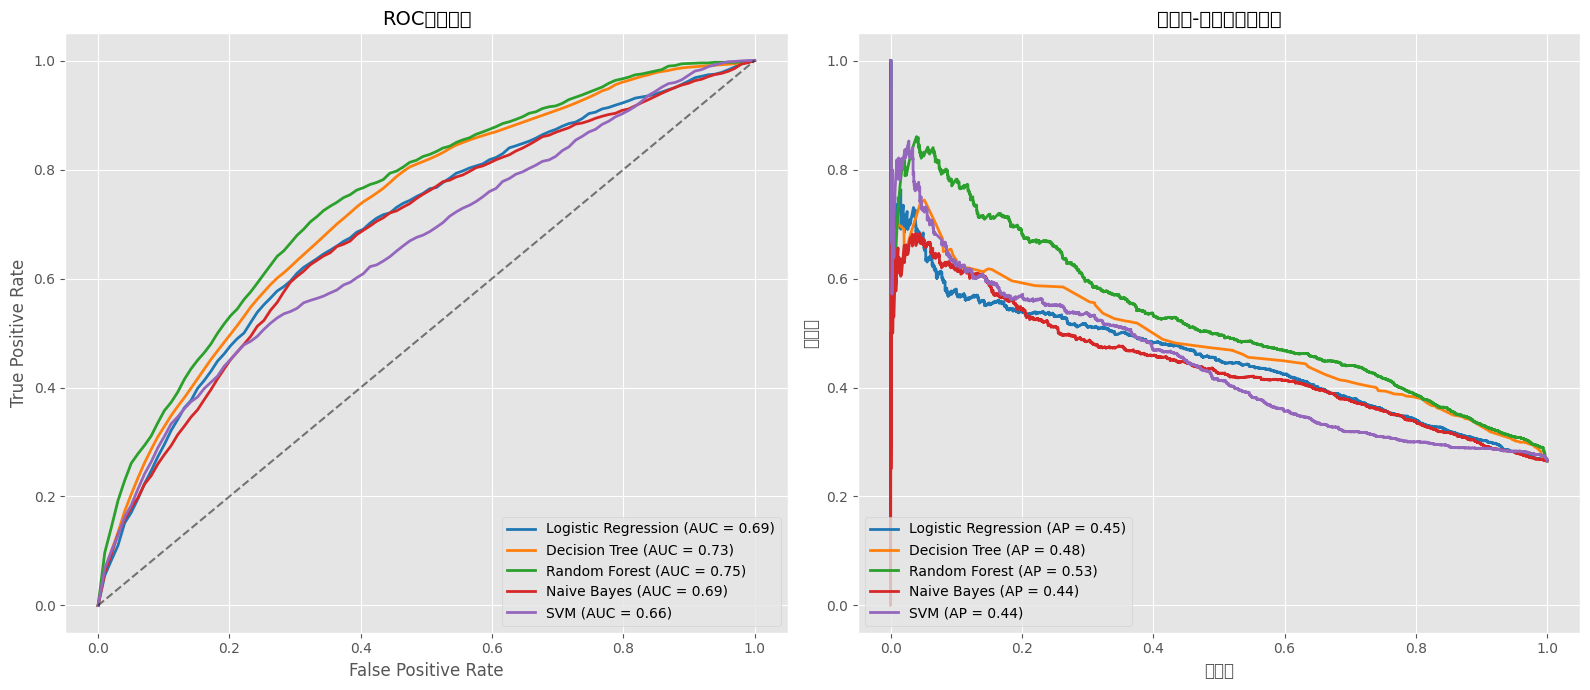


📊 最终模型性能：

Logistic Regression:
  ROC AUC: 0.694
   PR AUC: 0.451
  准确率: 0.735
  F1分数: 0.009

Decision Tree:
  ROC AUC: 0.727
   PR AUC: 0.483
  准确率: 0.751
  F1分数: 0.399

Random Forest:
  ROC AUC: 0.747
   PR AUC: 0.527
  准确率: 0.766
  F1分数: 0.372

Naive Bayes:
  ROC AUC: 0.685
   PR AUC: 0.441
  准确率: 0.713
  F1分数: 0.437

SVM:
  ROC AUC: 0.661
   PR AUC: 0.444
  准确率: 0.735
  F1分数: 0.000

🎉 最佳模型已保存为 best_model.pkl


In [ ]:
# 安装必要库（如果尚未安装）
!pip install xgboost imbalanced-learn scikit-plot gdown -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import (roc_curve, auc, accuracy_score,
                           precision_recall_curve, confusion_matrix,
                           f1_score)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import gdown

# ========== 初始化设置 ==========
plt.style.use('ggplot')
colors = list(mcolors.TABLEAU_COLORS.values())

# ========== 数据下载 & 加载 ==========
# 从Google Drive分享链接下载数据
file_id = '18WH0LIH0IhMlvVz2WAV9MNHFSyFeRYnD'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'client_data.csv'  # 保存文件名

# 执行下载
gdown.download(url, output, quiet=False)

# 验证下载
try:
    data = pd.read_csv(output)
    print(f"\n✅ 数据加载成功！记录数：{len(data)}")
    print("数据前两行示例：")
    print(data.head(2))
except Exception as e:
    print(f"\n❌ 数据加载失败：{str(e)}")
    raise

# ========== 数据预处理 ==========
# 自动识别目标列（假设第一列为目标变量）
target_col = data.columns[0]
print(f"\n目标变量列：'{target_col}'")

X = data.drop(target_col, axis=1)
y = data[target_col]

# 编码分类特征
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# 编码目标变量
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

print("\n预处理完成！")
print(f"特征矩阵形状：{X.shape}")
print("目标变量分布：\n", pd.Series(y).value_counts())

# ========== 特征选择 ==========
selected_features = [
    'total_charges',
    'total_long_distance_charges',
    'age',
    'total_extra_data_charges',
    'total_refunds',
    'gender'
]
X = X[selected_features]

# ========== 模型配置 ==========
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    }
}

# ========== 模型训练 & 优化 ==========
kf = KFold(n_splits=5, shuffle=True, random_state=42)
optimized_models = {}

print("\n开始模型优化...")
for name, model in models.items():
    if name in param_grids:
        print(f"\n🔧 正在优化 {name}...")
        grid_search = GridSearchCV(
            model,
            param_grids[name],
            cv=kf,
            scoring='roc_auc',
            n_jobs=-1
        )
        grid_search.fit(X, y)
        optimized_models[name] = grid_search.best_estimator_
        print(f"✅ 最佳参数：{grid_search.best_params_}")
    else:
        optimized_models[name] = model
        print(f"ℹ️ {name} 使用默认参数")

# ========== 模型评估 & 可视化 ==========
def save_plot(filename):
    """保存并下载图像文件"""
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    from google.colab import files
    files.download(filename)

results = {}
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 修复点：添加mean_fpr初始化
for idx, (name, model) in enumerate(optimized_models.items()):
    tprs = []
    aucs = []
    y_true_all, y_pred_all, y_proba_all = [], [], []

    # 初始化mean_fpr (关键修复)
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]
        except Exception as e:
            print(f"⚠️ {name} 训练失败：{str(e)}")
            continue

        # 收集数据
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)

        # 计算ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(auc(fpr, tpr))

    # 计算平均指标
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # 绘制ROC
    axes[0].plot(mean_fpr, mean_tpr,
                label=f"{name} (AUC = {mean_auc:.2f})",
                color=colors[idx],
                lw=2)

    # 计算PR曲线
    precision, recall, _ = precision_recall_curve(y_true_all, y_proba_all)
    pr_auc = auc(recall, precision)

    # 绘制PR曲线
    axes[1].plot(recall, precision,
                label=f"{name} (AP = {pr_auc:.2f})",
                color=colors[idx],
                lw=2)

    # 存储结果
    results[name] = {
        'ROC AUC': mean_auc,
        'PR AUC': pr_auc,
        'Accuracy': accuracy_score(y_true_all, y_pred_all),
        'F1': f1_score(y_true_all, y_pred_all)
    }

# 图表装饰
axes[0].set_title('ROC曲线对比', fontsize=14)
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].legend(loc="lower right")
axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.5)

axes[1].set_title('精确率-召回率曲线对比', fontsize=14)
axes[1].set_xlabel('召回率', fontsize=12)
axes[1].set_ylabel('精确率', fontsize=12)
axes[1].legend(loc="lower left")

plt.tight_layout()
save_plot("model_performance.png")
plt.show()

# 输出结果
print("\n📊 最终模型性能：")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  ROC AUC: {metrics['ROC AUC']:.3f}")
    print(f"   PR AUC: {metrics['PR AUC']:.3f}")
    print(f"  准确率: {metrics['Accuracy']:.3f}")
    print(f"  F1分数: {metrics['F1']:.3f}")

# 保存最佳模型（Random Forest示例）
import joblib
best_model = optimized_models['Random Forest']
joblib.dump(best_model, 'best_model.pkl')
print("\n🎉 最佳模型已保存为 best_model.pkl")

Downloading...
From: https://drive.google.com/uc?id=18WH0LIH0IhMlvVz2WAV9MNHFSyFeRYnD
To: /content/client_data.csv
100%|██████████| 556k/556k [00:00<00:00, 7.75MB/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

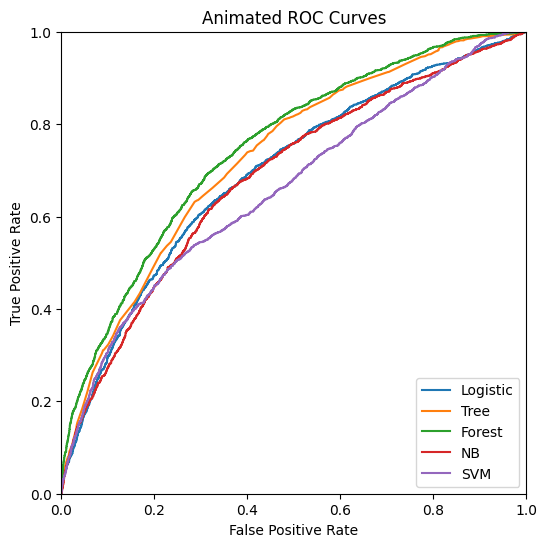

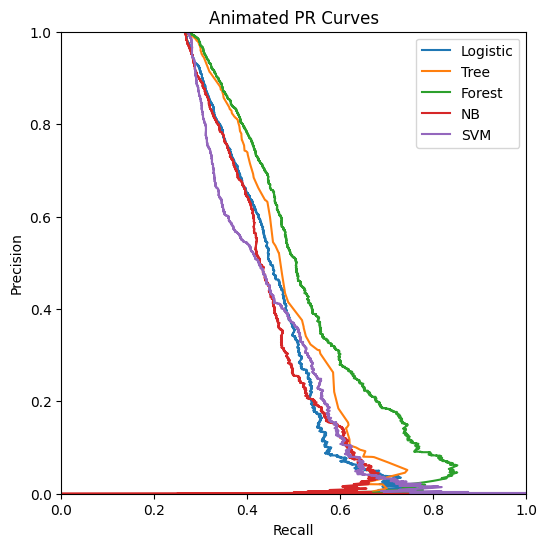

In [ ]:
# —— 安装依赖 —— #
!pip install -q gdown scikit-learn matplotlib pillow

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from google.colab import files

# —— 一、下载 & 加载数据 —— #
file_id = "18WH0LIH0IhMlvVz2WAV9MNHFSyFeRYnD"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "client_data.csv", quiet=False)
data = pd.read_csv("client_data.csv")

# —— 二、预处理 —— #
# 假设第一列是 churn（0/1），其余是特征
target_col = data.columns[0]
X = data.drop(target_col, axis=1)
y = data[target_col].copy()

# 分类特征编码
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# 只保留关键特征
selected_features = [
    'total_charges',
    'total_long_distance_charges',
    'age',
    'total_extra_data_charges',
    'total_refunds',
    'gender'
]
X = X[selected_features]

# —— 三、训练模型 & 计算曲线数据 —— #
models = {
    "Logistic": LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000),
    "Tree":     DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2),
    "Forest":   RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=10),
    "NB":       GaussianNB(),
    "SVM":      SVC(probability=True)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
roc_data = {}
pr_data  = {}

for name, model in models.items():
    all_true = []
    all_proba = []
    for tr, te in kf.split(X, y):
        model.fit(X.iloc[tr], y[tr])
        proba = model.predict_proba(X.iloc[te])[:, 1]
        all_true.append(y[te])
        all_proba.append(proba)
    y_true = np.concatenate(all_true)
    y_proba = np.concatenate(all_proba)

    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_data[name] = (fpr, tpr)
    rec, pre, _ = precision_recall_curve(y_true, y_proba)
    pr_data[name] = (rec, pre)

# —— 四、绘制并保存 ROC 动画 —— #
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_xlim(0,1); ax1.set_ylim(0,1)
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Animated ROC Curves")
lines1 = {}
for name in models:
    lines1[name], = ax1.plot([], [], label=name)
ax1.legend(loc="lower right")

def update_roc(frame):
    for name in models:
        fpr, tpr = roc_data[name]
        cutoff = int(len(fpr) * frame / 100)
        lines1[name].set_data(fpr[:cutoff], tpr[:cutoff])
    return list(lines1.values())

ani_roc = animation.FuncAnimation(fig1, update_roc, frames=101, blit=True, interval=50)
roc_gif = "roc_animation.gif"
ani_roc.save(roc_gif, writer="pillow", fps=30)
files.download(roc_gif)  # 自动弹出下载

# —— 五、绘制并保存 PR 动画 —— #
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.set_xlim(0,1); ax2.set_ylim(0,1)
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.set_title("Animated PR Curves")
lines2 = {}
for name in models:
    lines2[name], = ax2.plot([], [], label=name)
ax2.legend(loc="upper right")

def update_pr(frame):
    for name in models:
        rec, pre = pr_data[name]
        cutoff = int(len(rec) * frame / 100)
        lines2[name].set_data(rec[:cutoff], pre[:cutoff])
    return list(lines2.values())

ani_pr = animation.FuncAnimation(fig2, update_pr, frames=101, blit=True, interval=50)
pr_gif = "pr_animation.gif"
ani_pr.save(pr_gif, writer="pillow", fps=30)
files.download(pr_gif)  # 自动弹出下载
